Remote sensing image exploration using python
## Author: MD KAMRUL ISLAM

For convaniance of installing packages I worked in google collab# This file contains the coding for NDVI calculation in using python. 

Conneting my google drive with colab

In [19]:
import os, glob
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Installing rasterio libarary and importing other packages

In [38]:
!pip install rasterio
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt
import earthpy.plot as ep

opening my raster image( I have used landsat 8 image which is a 7 band raster image

In [21]:
image = rasterio.open("/content/drive/MyDrive/Colabfolder/MainImage.tif")

For raster image python counting usually starts from 1, so based on that we know that for Landsat 8 image, 5th band is Nir and 4th band is red. Let's extract NIR and red bands first from the composite tiff file.

In [22]:
nir = image.read(5)
red = image.read(4)

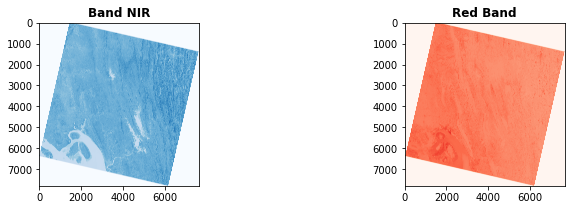

In [31]:
fig, (ax1, ax2) = pplt.subplots(1,2, figsize=(12,3))
show(nir, ax=ax1, cmap='Blues', title='Band NIR')
show((red), ax=ax2, cmap='Reds', title='Red Band')
pplt.show()

Calculate the NDVI using formula

In [6]:
import numpy
# Allow division by zero
numpy.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)

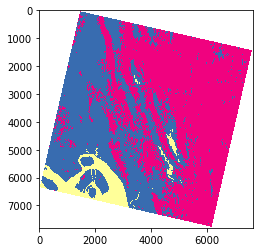

In [11]:
show(ndvi, vmin=-1, vmax=1, cmap='Accent')## Visualizing NDVI

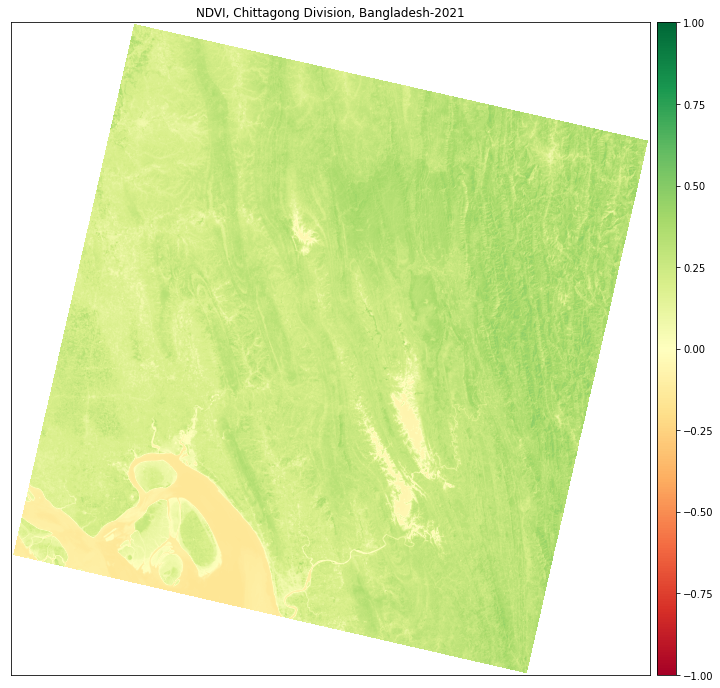

In [41]:
## Let's visualize it in better way
ep.plot_bands(ndvi,cmap='RdYlGn',scale=False,vmin=-1, vmax=1, title="NDVI, Chittagong Division, Bangladesh-2021")
plt.show()

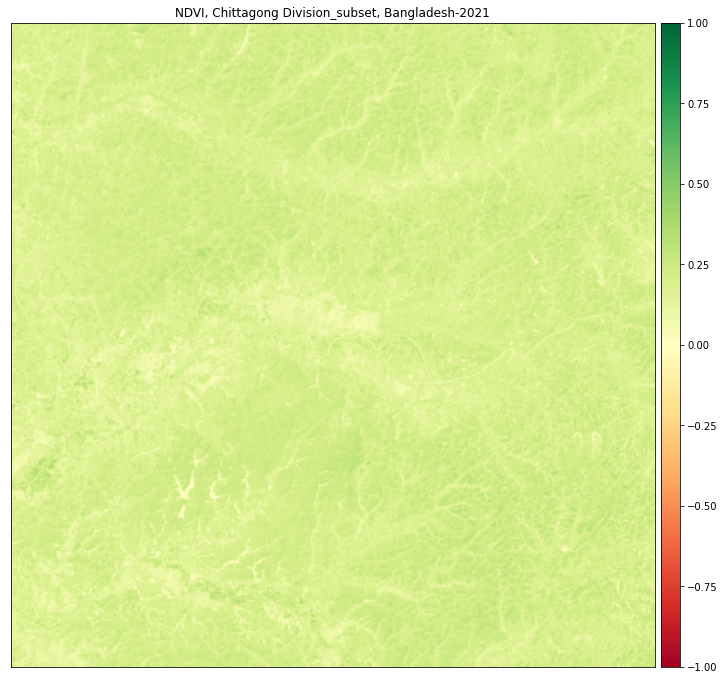

In [42]:
# Let's create NDVI subset and Plot it
ndvi_sub = ndvi[1500:2000, 1500:2000]
ep.plot_bands(ndvi_sub,
              cmap='RdYlGn',
              scale=False,
              vmin=-1, vmax=1,
              title="NDVI, Chittagong Division_subset, Bangladesh-2021")
plt.show()

**Similarly we can calculate any band maths, or Band ratios**